In [25]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [13]:
import pandas as pd
df = pd.read_csv("Titanic-Dataset.csv")


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [15]:
df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


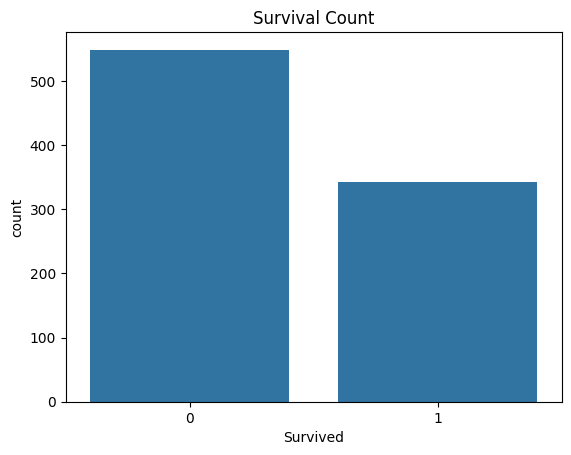

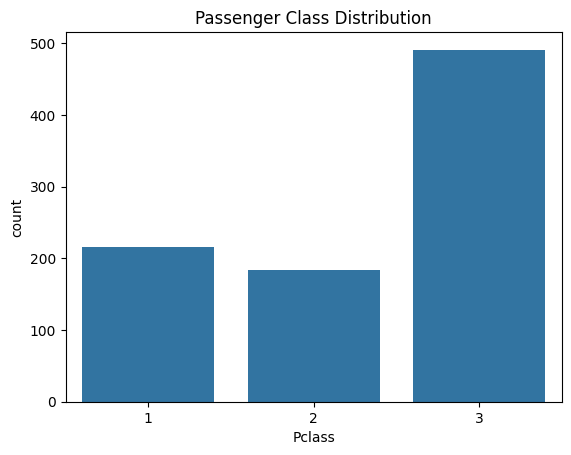

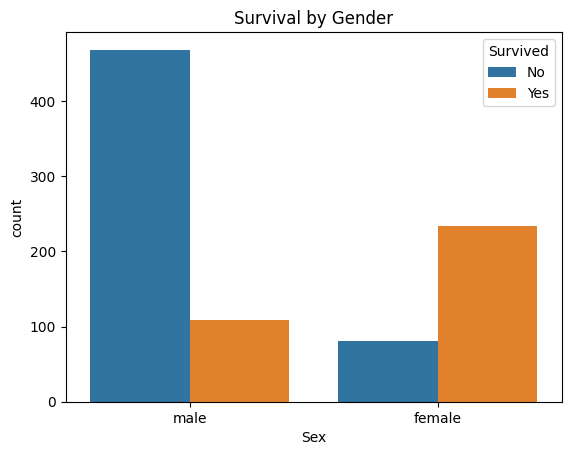

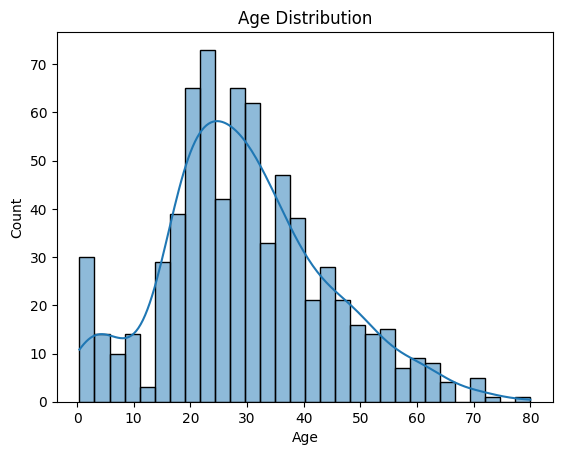

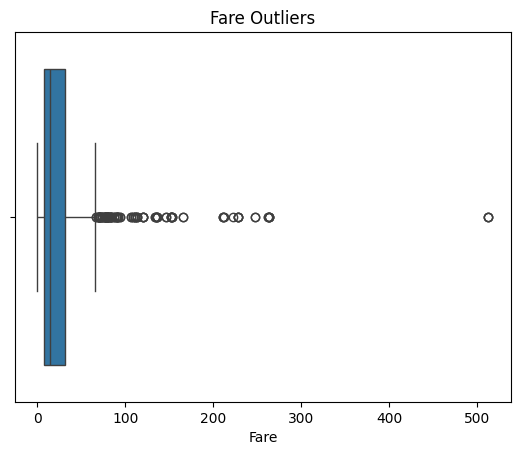

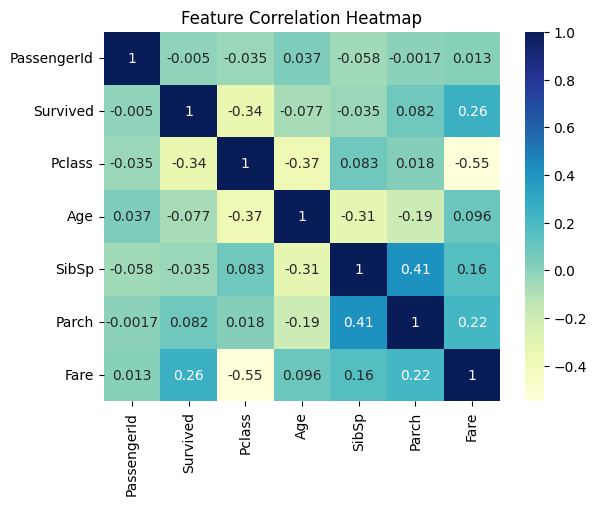

In [19]:
# 1. Survival Count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# 2. Passenger Class Distribution
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

# 3. Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# 4. Age Distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# 5. Boxplot: Fare Outliers
sns.boxplot(x=df['Fare'])
plt.title("Fare Outliers")
plt.show()
()
# Correlation Heatmap
numeric_df = df.select_dtypes(include=['number'])  # Keep only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()



In [20]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)


/tmp/ipython-input-20-224943107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-20-224943107.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [21]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [22]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [23]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]


In [27]:

df.to_csv("titanic_cleaned.csv", index=False)

from google.colab import files
files.download("titanic_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>